# Lesson 1.6: Intro to Machine Learning

### Lesson Duration: 3 hours

> Purpose: The purpose of this lesson is to understand the concept of data distributions, mainly the continuous distributions. Besides that, we will build a simple linear regression model to predict a numerical target variable and then talk about some of the other concepts including assumptions of the model and how can we check if our data follows those assumptions or not.

> :exclamation: Note for instructor: In this lesson we will show the students how to build a simple linear regression model without performing data pre-processing steps such as scaling numerical features, checking the distribution of data, and using transformations to bring the distributions closer to normal distribution. The model will perform badly as will be seen from the r2 measure. This will help the students understand that different models are based on different assumptions and we have to check those assumptions and make the data more suitable for that model to get better results. GARBAGE IN, GARBAGE OUT!

> [**Slides for this lesson**](https://docs.google.com/presentation/d/1I3M1_9pV777ifCrx67xlIFMnbOJQfAsULapB5_QpWCA/edit?usp=sharing)

---

### Setup

To start this lesson, students should have:

- Completed lesson 1.5
- All previous Setup

### Learning Objectives

After this lesson, students will be able to:

- Explain data distributions (continuous)
- Describe linear regression, its parameters, and optimization methods
- Apply various data transformations to bring non-normal distribution/behavior closer to a normal distribution
- Train the model and prepare to test the accuracy of the model

---

### Lesson 1 key concepts

> :clock10: 20 min

- Introduction to data distributions

  - Random variables (continuous and discrete)
  - Normal distribution and its characteristics
  - Standard normal distribution

- Working with `SciPy` and `NumPy` to generate random numbers and plot using `Matplotlib` and `Seaborn`


:exclamation: Note: Keep using `merged_clean_ver2.csv` file.

In [3]:
import numpy as np
from scipy.stats import norm
import math
import matplotlib.pyplot as plt
%matplotlib inline

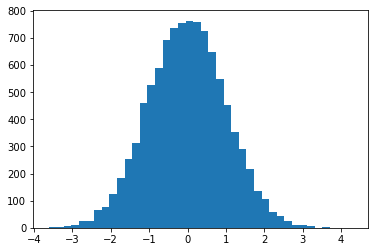

In [4]:
plt.hist(np.random.randn(10000), bins=40)
plt.show()

In [5]:
from scipy.stats import norm
import math

normal = norm(0, math.sqrt(9))
# print(normal.pdf(4))
# print(normal.cdf(2))
# print(normal.rvs())

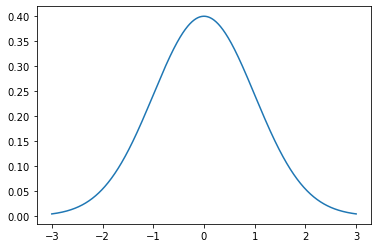

In [6]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(-3,3,1000) # Generating evenly spaced numbers (1000)  between -3 and 3.
y = norm.pdf(x) # Generating a plot of the 'Normal distribution' using the points in x.
ax.plot(x,y)
plt.show()

#### :pencil2: Check for Understanding - Class activity/quick quiz

> :clock10: 10 min (+ 10 min Review)

# 1.06 Activity 1

### Debate

1. What is the difference between a normal distribution and standard normal distribution?
2. Go through the documentation on [uniform distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html).
3. Discuss the use of uniform distribution in generating random numbers.

### Code

4. Plot a uniform distribution - [documentation](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.rand.html#numpy.random.rand).

### Class debate

1. The standard normal distribution (z distribution) is a normal distribution with a mean of 0 and a standard deviation of 1.
   Any point (x) from a normal distribution can be converted to the standard normal distribution (z) with the formula z = (x-mean) / standard deviation. z for any particular x value shows how many standard deviations x is away from the mean for all x values.

2. Documentation - [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html)

3. Discuss pseudo-random number generators - [documentation](https://www.random.org/randomness/)

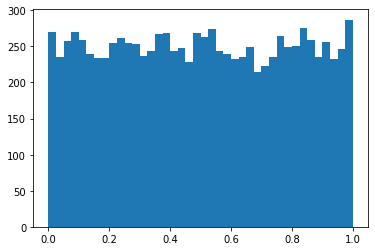

In [36]:
### Code

# 4
plt.hist(np.random.rand(10000), bins=40)
plt.show()

### Lesson 2 key concepts

> :clock10: 20 min

- Introduction to Machine learning
  - _Supervised_ vs. _unsupervised_ learning
  - Supervised learning: Prediction vs. Classification Problems
  - Introduction to linear regression
  - Features/independent variables/X's vs. labels/dependent variable/Y

#### :pencil2: Check for Understanding - Class activity/quick quiz

> :clock10: 10 min (+ 10 min Review)

# 1.06 Activity 2

### Debate

1. What kind of problems we can solve with supervised learning? List down some examples with the factors and the target.
2. What kind of problems we can solve with unsupervised learning? List down some examples with the factors and the target.

### Lesson 3 key concepts

> :clock10: 20 min

- Introduction to libraries: `sklearn` and `statsmodels`
- Building a simple linear regression model

In [9]:
import pandas as pd

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [10]:
# apply linear regression on the following data
data = pd.read_csv('./files_for_lesson_and_activities/regression_data1.csv') # this file is inside files_for_lesson_and_activities folder
data.head()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
0,2346,420,446,468,503,14552,15.500000,21.0
1,497,350,364,357,384,11696,3.080000,3.0
2,1229,469,502,507,544,17313,7.500000,20.0
3,325,148,181,171,209,6334,6.700000,5.0
4,768,174,201,220,249,7802,8.785714,10.0


In [30]:
Y = data['TARGET_D']
X = data.drop(['TARGET_D'], axis=1)
# The linear model has the formula Y = a * X + b, with 'add_constant' we force the model
# to have an intercept because by default on statsmodel library the `linear models`
# doesn't have intercept!!!

In [31]:
X = sm.add_constant(X)

In [32]:
model = sm.OLS(Y,X).fit()

In [33]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               TARGET_D   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     258.2
Date:                Mon, 03 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:34:22   Log-Likelihood:                -18313.
No. Observations:                4843   AIC:                         3.664e+04
Df Residuals:                    4835   BIC:                         3.669e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2092      0.503     12.346      0.0

In [34]:
# Using sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
Y = data['TARGET_D']
X = data.drop(['TARGET_D'], axis=1)

In [40]:
lm = linear_model.LinearRegression()

In [41]:
model = lm.fit(X,Y)

In [42]:
print("R2 value is = ",round(lm.score(X,Y),2))

R2 value is =  0.27


In [43]:
predictions = lm.predict(X)

In [44]:
print("R2 value is = ",round(r2_score(Y, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)

R2 value is =  0.27
The intercept of the model is =  6.209223873156638
The coefficients of the model are =  [ 9.69296995e-05 -2.00305674e-03  9.84630309e-05 -2.21132354e-03
  6.71311365e-03  3.09166582e-05  6.21136417e-01]


In [45]:
predictions = lm.predict(X)
mse = mean_squared_error(Y, predictions)
print("The mse of the model is = ", mse)

The mse of the model is =  112.71352812617637


#### :pencil2: Check for Understanding - Class activity/quick quiz

> :clock10: 10 min (+ 10 min Review)

# 1.06 Activity 3

**_Individual Reading_**

- Read the article [medium article](https://medium.com/@venkateshpnk22/ten-minutes-to-learn-linear-regression-for-dummies-5469038f4781).
- List down some of the keywords that you identified in the article. Do not worry about understanding what do the terms mean right now. We will discuss linear regression in greater detail as we go on.

### Lesson 4 key concepts

> :clock10: 20 min

- More on linear regression
  - Coefficients in a linear regression equation
  - Ordinary least squares method
  - Assumptions in a linear regression model
    - (for reference:)
      - The true relationship is linear
      - Errors are normally distributed
      - Homoscedasticity of errors (or, equal variance around the line).
      - Independence of the observations
- Multicollinearity
  - Using heatmap to check multicollinearity

In [47]:
import seaborn as sns

In [48]:
correlations_matrix = data.corr()

In [49]:
mask = np.zeros_like(correlations_matrix)

In [50]:
mask[np.triu_indices_from(mask)] = True

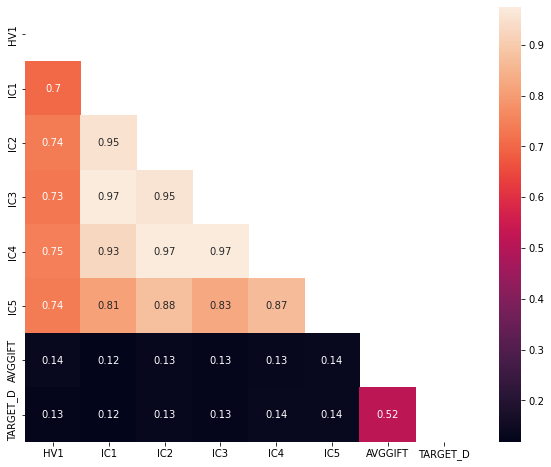

In [51]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [52]:
# We can see that there is a very strong positive correlation between IC1 and IC2, IC2 and IC3, IC3 and IC4
# using the concept of multicollinearity, let's drop IC2, IC3 and IC4
data = data.drop(['IC2', 'IC3', 'IC4'],axis=1)

#### :pencil2: Check for Understanding - Class activity/quick quiz

> :clock10: 10 min (+ 10 min Review)

# 1.06 Activity 4 (Optional)

Display the OLS summary using Statmodels library and conduct your research to find out the different statistics in the table. What does each element in the table mean? (_There is a summary table in the output when you use linear regression with Statmodels._)

Solution to activity 4: https://www.datarobot.com/blog/ordinary-least-squares-in-python/

# Lab | Customer Analysis Round 4

In today's lesson we talked about continuous distributions (mainly normal distribution), linear regression and how multicollinearity can impact the model. In this lab, we will test your knowledge on those things using the `marketing_customer_analysis.csv` file. You have been using the same data in the previous labs (round 2 and 3). You can continue using the same jupyter file. The file can be found in the `files_for_lab` folder.

### Get the data 

Use the jupyter file from the last lab (Customer Analysis Round 3)

### Complete the following task 

- Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical variables look like a normal distribution 
- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 
- Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

### Additional Readings

- [Assumptions of linear regression model](https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-regression/simple-linear-regression-assumptions.html)
- [Transformations](https://aegis4048.github.io/transforming-non-normal-distribution-to-normal-distribution)
- [SciPy - cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_SciPy_Cheat_Sheet_Linear_Algebra.pdf)
- [NumPy - cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)
- [Sklearn - cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf)